Import the dataset

In [1]:
import pandas as pd
df = pd.read_csv("final_dataset_with_likes.csv")
df.head()

,Unnamed: 0,experiments,total_experiments,total_samples,interface,countries,languages,search_queries,video_id,video_title,...,human_rights,abortion_rights,war_justification,womens_rights,topic,ideology,% left,% right,likes,followers
0,1018,{'general'},0,0,tk0,{'nl'},{'en'},{'anti-war candidate european elections 2024 n...,7304639473243933984,A far-right populist who has previously called...,...,0.000000,0.0,0.0,0.0,war,left,1.000000,0.000000,76800.0,3600000.0
1,1019,{'general'},0,0,tk0,{'nl'},{'en'},{'anti-war candidate european elections 2024 n...,7304691326711385377,New Dutch PM wants Islam banned #itvnews #neth...,...,0.000000,0.0,0.0,0.0,war,no mention,0.000000,0.000000,182600.0,4500000.0
2,1020,{'general'},0,0,tk0,{'nl'},{'en'},{'anti-war candidate european elections 2024 n...,7304737421478874400,The anti-Islam populist nicknamed Mozart has j...,...,0.000000,0.0,0.0,0.0,war,no mention,0.000000,0.000000,8283.0,7500000.0
3,1021,{'general'},0,0,tk0,{'nl'},{'en'},{'anti-war candidate european elections 2024 n...,7304785915040320801,Geerts Wilders’ far-right Freedom Party has wo...,...,0.002833,0.0,0.0,0.0,war,left,1.000000,0.000000,45700.0,175200.0
4,1022,{'general'},0,0,tk0,{'nl'},{'en'},{'anti-war candidate european elections 2024 n...,7305171428117155104,What do you think of this? Let's treat each ot...,...,0.000000,0.0,0.0,0.0,war,left,0.666667,0.333333,NaN,287.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1504 non-null   int64  
 1   experiments         1504 non-null   object 
 2   total_experiments   1504 non-null   int64  
 3   total_samples       1504 non-null   int64  
 4   interface           1504 non-null   object 
 5   countries           1504 non-null   object 
 6   languages           1504 non-null   object 
 7   search_queries      1504 non-null   object 
 8   video_id            1504 non-null   int64  
 9   video_title         1504 non-null   object 
 10  video_url           1504 non-null   object 
 11  video_link          1504 non-null   object 
 12  description         1504 non-null   object 
 13  creator_id          1504 non-null   object 
 14  creator_url         1504 non-null   object 
 15  creator_link        1504 non-null   object 
 16  user_a

# Correlation Matrix

Discard the non-numeric data before generating it

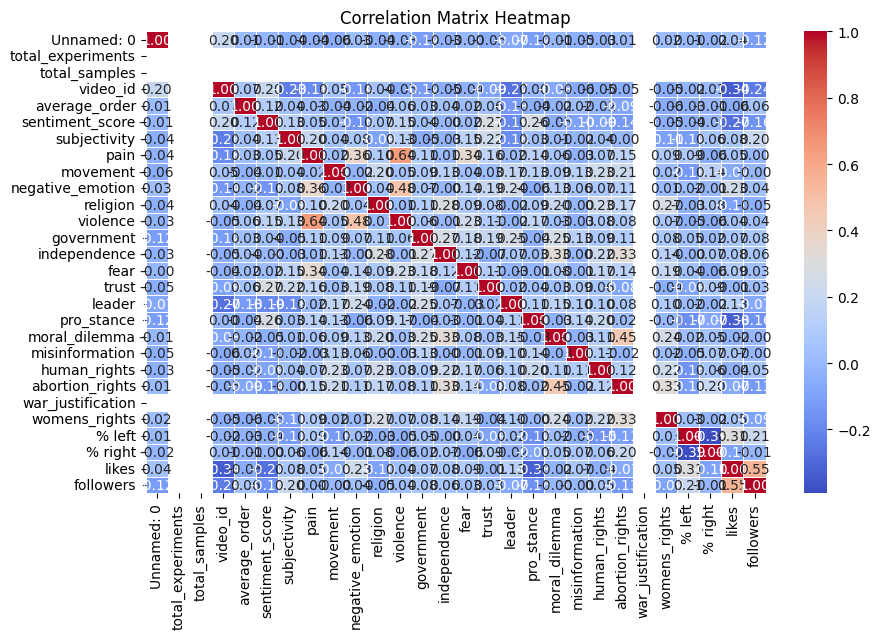

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
# correlation_matrix = numeric_df.corr()
correlation_matrix = numeric_df.corr(method="spearman")

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Correlate each of the feature to the political ideology of the content

In [4]:
import pandas as pd

# Encode ideology: left = -1, right = 1
df["ideology_encoded"] = df["ideology"].map({"left": -1, "right": 1})

# Select only numerical columns for correlation
features = [
    "sentiment_score", "subjectivity", "pain", "movement", "negative_emotion", 
    "religion", "violence", "government", "independence", "fear", "trust", 
    "leader", "pro_stance", "moral_dilemma", "misinformation", "human_rights", 
    "abortion_rights", "war_justification", "womens_rights", "likes", "followers"
]

# Compute correlation with ideology
correlation_with_ideology = df[features + ["ideology_encoded"]].corr()["ideology_encoded"].sort_values(ascending=False)

# Display correlation results
print(correlation_with_ideology)


ideology_encoded     1.000000
abortion_rights      0.242687
human_rights         0.230249
misinformation       0.168549
trust                0.125424
movement             0.101690
religion             0.091002
negative_emotion     0.090951
independence         0.078307
subjectivity         0.069085
pro_stance           0.047739
moral_dilemma        0.001692
likes               -0.010280
leader              -0.019836
sentiment_score     -0.034635
womens_rights       -0.065606
violence            -0.095255
government          -0.101176
fear                -0.106981
pain                -0.116367
followers           -0.125463
war_justification         NaN
Name: ideology_encoded, dtype: float64


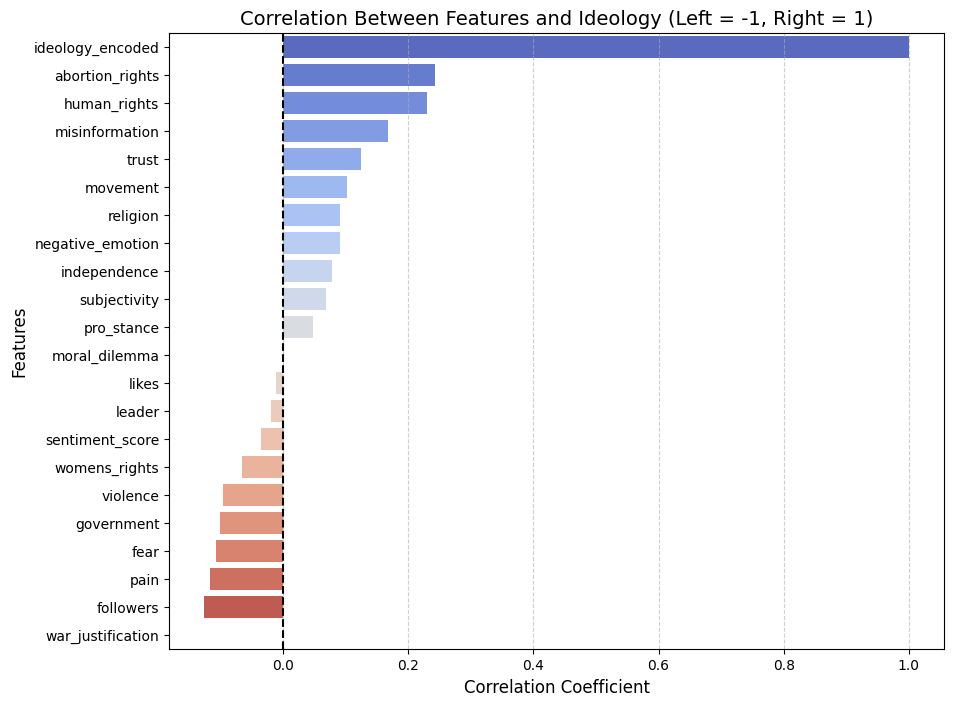

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 8))

# Plot correlations as a horizontal bar chart
sns.barplot(
    x=correlation_with_ideology.values, 
    y=correlation_with_ideology.index, 
    hue=correlation_with_ideology.index,  # Assign hue based on features
    palette="coolwarm",  # Use color palette
    dodge=False  # No separation between bars, just color variations
)

# Add title and labels
plt.title("Correlation Between Features and Ideology (Left = -1, Right = 1)", fontsize=14)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.axvline(x=0, color="black", linestyle="--")  # Add a reference line at 0
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show the plot
plt.show()


# Visibility order and topics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1504 non-null   int64  
 1   experiments         1504 non-null   object 
 2   total_experiments   1504 non-null   int64  
 3   total_samples       1504 non-null   int64  
 4   interface           1504 non-null   object 
 5   countries           1504 non-null   object 
 6   languages           1504 non-null   object 
 7   search_queries      1504 non-null   object 
 8   video_id            1504 non-null   int64  
 9   video_title         1504 non-null   object 
 10  video_url           1504 non-null   object 
 11  video_link          1504 non-null   object 
 12  description         1504 non-null   object 
 13  creator_id          1504 non-null   object 
 14  creator_url         1504 non-null   object 
 15  creator_link        1504 non-null   object 
 16  user_a

average_order        1.000000
followers            0.136352
sentiment_score      0.119191
violence             0.083596
independence         0.075107
fear                 0.062658
trust                0.060779
likes                0.056970
misinformation       0.037659
government           0.035706
pain                 0.028882
subjectivity         0.019867
movement             0.018603
negative_emotion     0.009312
moral_dilemma       -0.004139
pro_stance          -0.011580
womens_rights       -0.023614
religion            -0.032518
human_rights        -0.037935
abortion_rights     -0.048191
leader              -0.115736
war_justification         NaN
Name: average_order, dtype: float64


/tmp/ipykernel_3632/3994871219.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


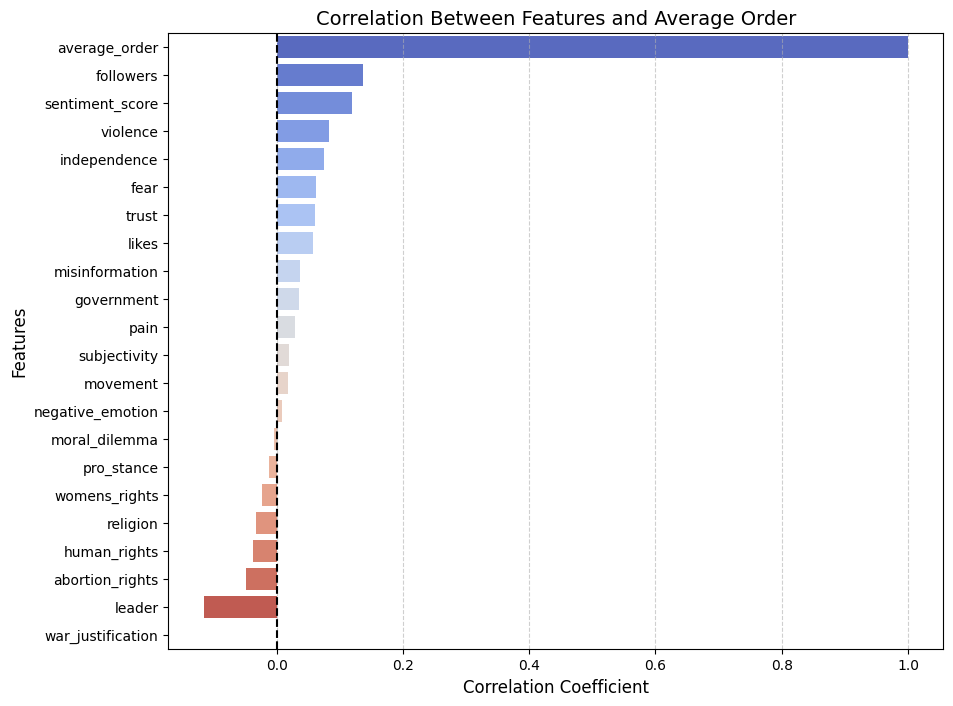

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to correlate with average_order
values_to_relate = [
    "sentiment_score", "subjectivity", "pain", "movement", "negative_emotion", 
    "religion", "violence", "government", "independence", "fear", "trust", 
    "leader", "pro_stance", "moral_dilemma", "misinformation", "human_rights", 
    "abortion_rights", "war_justification", "womens_rights", "likes", "followers"
]

# Compute correlation of average_order with these features
correlation_with_average_order = df[values_to_relate + ["average_order"]].corr()["average_order"].sort_values(ascending=False)

# Display correlation results
print(correlation_with_average_order)

# Plot correlations with average_order as a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(
    x=correlation_with_average_order.values, 
    y=correlation_with_average_order.index, 
    palette="coolwarm"
)

# Add title and labels
plt.title("Correlation Between Features and Average Order", fontsize=14)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.axvline(x=0, color="black", linestyle="--")  # Reference line at 0
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show the plot
plt.show()

# TODO: Quitar los no significantes


# How does each country talk about each topic?

Top 1 per country

/tmp/ipykernel_3632/4108345760.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  common_emotions = df.groupby(['countries', 'topic']).apply(get_most_common_emotion).reset_index()


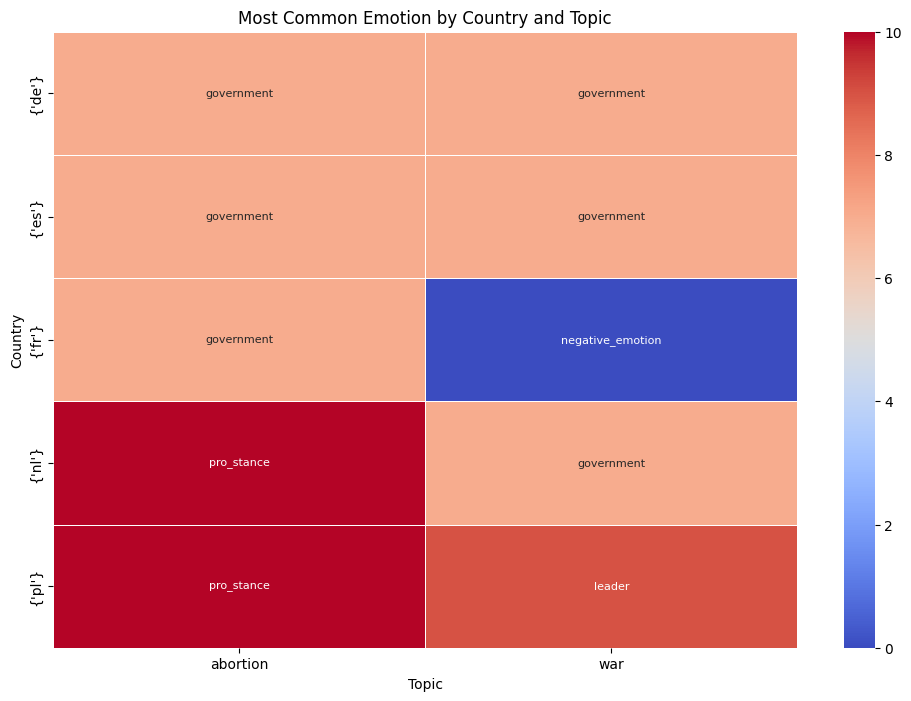

In [8]:
# List of emotion-related columns
emotion_columns = [
    "negative_emotion", "fear", "trust", "pain", "movement", "religion", "violence",
    "government", "independence", "leader", "pro_stance", "moral_dilemma", "misinformation",
    "human_rights", "abortion_rights", "war_justification", "womens_rights"
]

# Create a function to get the most common emotion for each country and topic
def get_most_common_emotion(group):
    # Calculate the mean for each emotion column
    mean_emotions = group[emotion_columns].mean()
    
    # Find the emotion with the highest average value
    most_common_emotion = mean_emotions.idxmax()
    highest_value = mean_emotions.max()
    
    return pd.Series({
        'most_common_emotion': most_common_emotion,
        'emotion_value': highest_value
    })

# Apply the function to group by country and topic
common_emotions = df.groupby(['countries', 'topic']).apply(get_most_common_emotion).reset_index()

# Create a pivot table for the heatmap visualization
pivot_table = common_emotions.pivot(index="countries", columns="topic", values="most_common_emotion")

# Create a numeric mapping for the emotions (only for heatmap coloring purposes)
emotion_map = {emotion: idx for idx, emotion in enumerate(emotion_columns)}

# Map the emotions in the common_emotions DataFrame to their numeric values for visualization
common_emotions['emotion_numeric'] = common_emotions['most_common_emotion'].map(emotion_map)

# Create a pivot table with numeric emotion values
pivot_table_numeric = common_emotions.pivot(index="countries", columns="topic", values="emotion_numeric")

# Visualize as a heatmap with numeric values (using annotations for emotion names)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_numeric, annot=pivot_table, cmap="coolwarm", cbar=True, fmt="s", 
            linewidths=0.5, annot_kws={"size": 8})
plt.title("Most Common Emotion by Country and Topic")
plt.xlabel("Topic")
plt.ylabel("Country")
plt.show()


Top 5 per country

/tmp/ipykernel_3632/3412031688.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_emotions = df.groupby(['countries', 'topic']).apply(get_top_5_emotions).reset_index()
/tmp/ipykernel_3632/3412031688.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_emotions_table = top_emotions_table.applymap(lambda x: ", ".join(x))


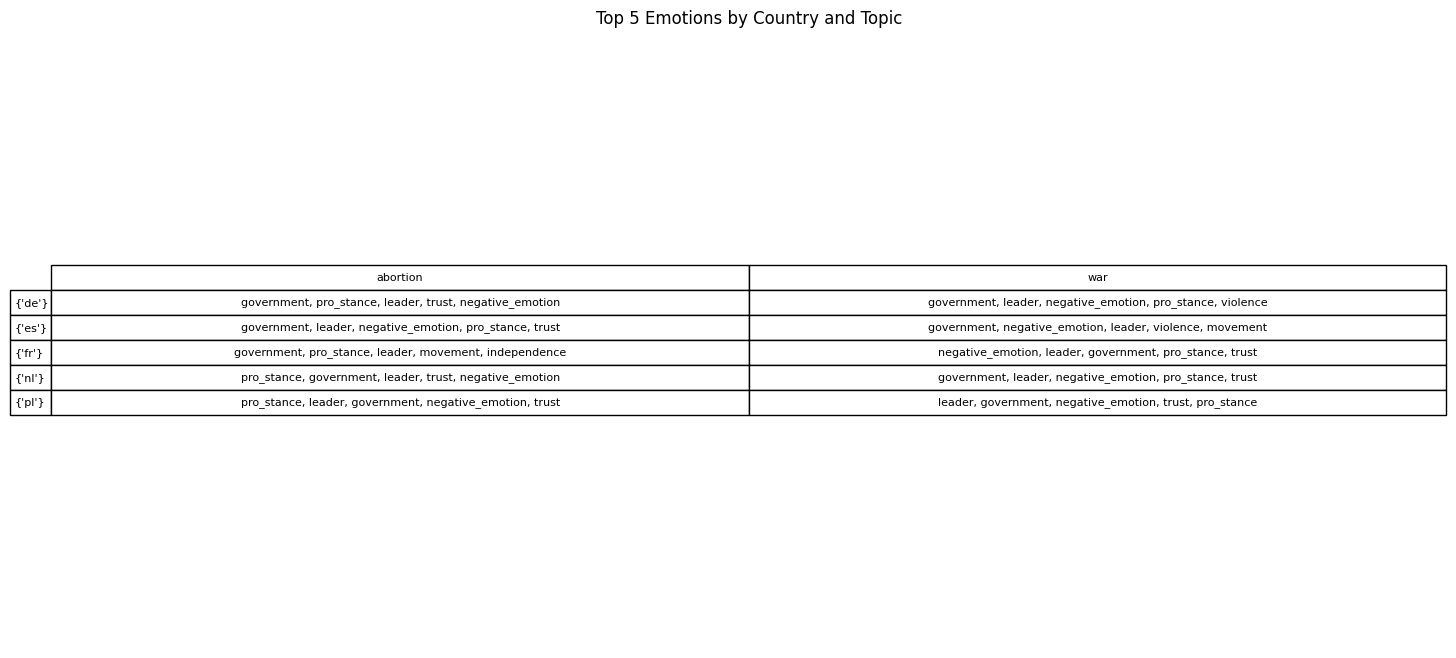

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# List of emotion-related columns
emotion_columns = [
    "negative_emotion", "fear", "trust", "pain", "movement", "religion", "violence",
    "government", "independence", "leader", "pro_stance", "moral_dilemma", "misinformation",
    "human_rights", "abortion_rights", "war_justification", "womens_rights"
]

# Create a function to get the top 5 emotions for each country and topic
def get_top_5_emotions(group):
    # Calculate the mean for each emotion column
    mean_emotions = group[emotion_columns].mean()
    
    # Sort the emotions by their average value in descending order
    sorted_emotions = mean_emotions.sort_values(ascending=False)
    
    # Get the top 5 emotions
    top_5_emotions = sorted_emotions.head(5)
    
    return pd.Series({
        'top_5_emotions': top_5_emotions.index.tolist(),
        'top_5_values': top_5_emotions.values.tolist()
    })

# Apply the function to group by country and topic
top_emotions = df.groupby(['countries', 'topic']).apply(get_top_5_emotions).reset_index()

# Create a table that lists the top 5 emotions
top_emotions_table = top_emotions.pivot(index="countries", columns="topic", values="top_5_emotions")

# Format the table to display emotions as comma-separated strings
top_emotions_table = top_emotions_table.applymap(lambda x: ", ".join(x))

# Plotting the top emotions as a table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Create a table within the plot
table = ax.table(cellText=top_emotions_table.values,
                rowLabels=top_emotions_table.index,
                colLabels=top_emotions_table.columns,
                loc='center', cellLoc='center')

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.5, 1.5)

plt.title("Top 5 Emotions by Country and Topic")
plt.show()
